# **Examen Machine Learning Coding Dojo - Intento 2**


# **Alumno:** Cristian Lugo

**Objetivo:**

Este examen tiene como objetivo evaluar la capacidad del estudiante para limpiar, explorar, implementar y evaluar modelos de clasificación en un dataset de diabetes. Utilizaremos el «Diabetes Dataset» disponible en Kaggle. Los estudiantes deben demostrar habilidades prácticas en la manipulación de datos, creación de visualizaciones y modelado predictivo.

Saving diabetes.csv to diabetes (22).csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
El número de registros duplicados es: 0


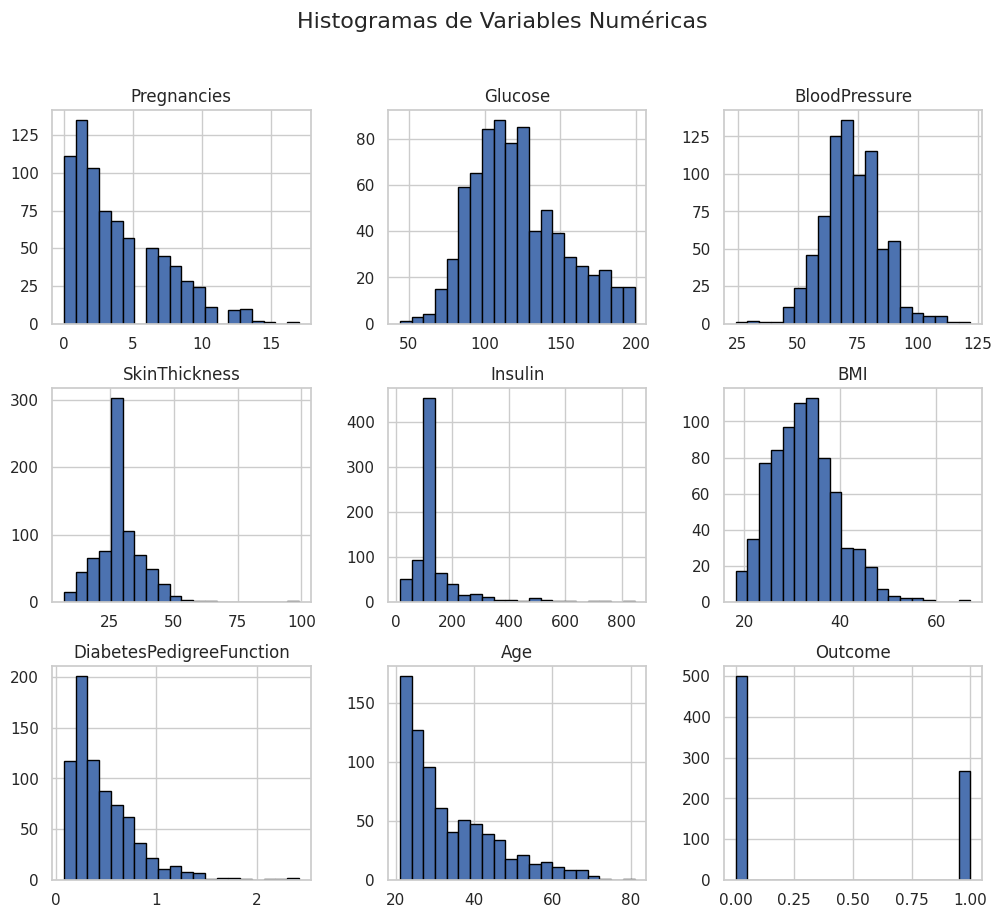

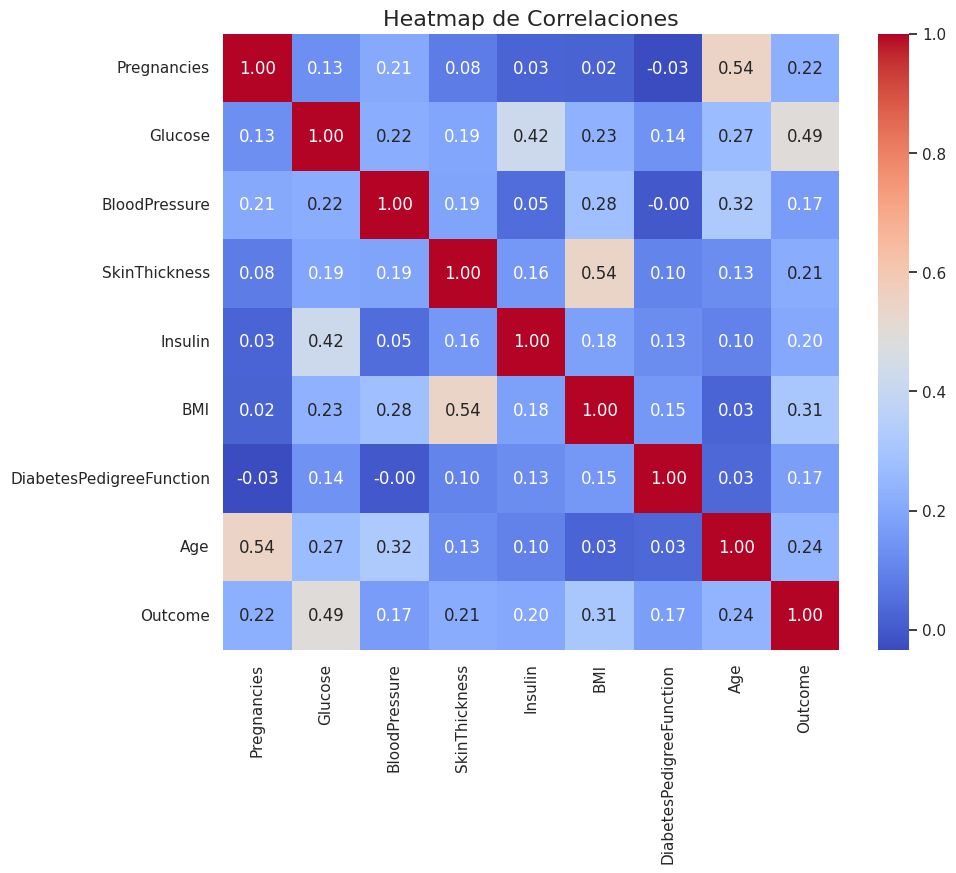

El mapa de calor confirma que las variables como Glucose, BMI, y Age son importantes para el diagnóstico de diabetes.
Esto sugiere que niveles más altos de glucosa están asociados con un mayor riesgo de diabetes.
Esto sugiere que las personas con un BMI más alto tienen mayor probabilidad de desarrollar diabetes debido al vínculo con la obesidad.


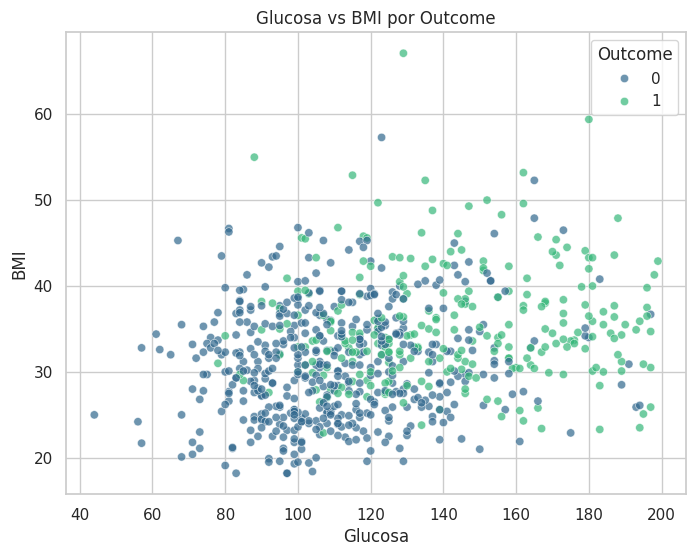

Personas con diabetes (Outcome=1) tienden a tener niveles altos de glucosa y BMI:
Glucosa alta: Valores de glucosa por encima de 120 son comunes en personas con diabetes.
BMI elevado: Un BMI superior a 30 (indicativo de sobrepeso u obesidad) también es frecuente en este grupo.
Estadísticas Descriptivas del Dataset:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.656250      72.386719      29.108073  140.671875   
std       3.369578   30.438286      12.096642       8.791221   86.383060   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      25.000000  121.500000   
50%       3.000000  117.000000      72.000000      29.000000  125.000000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

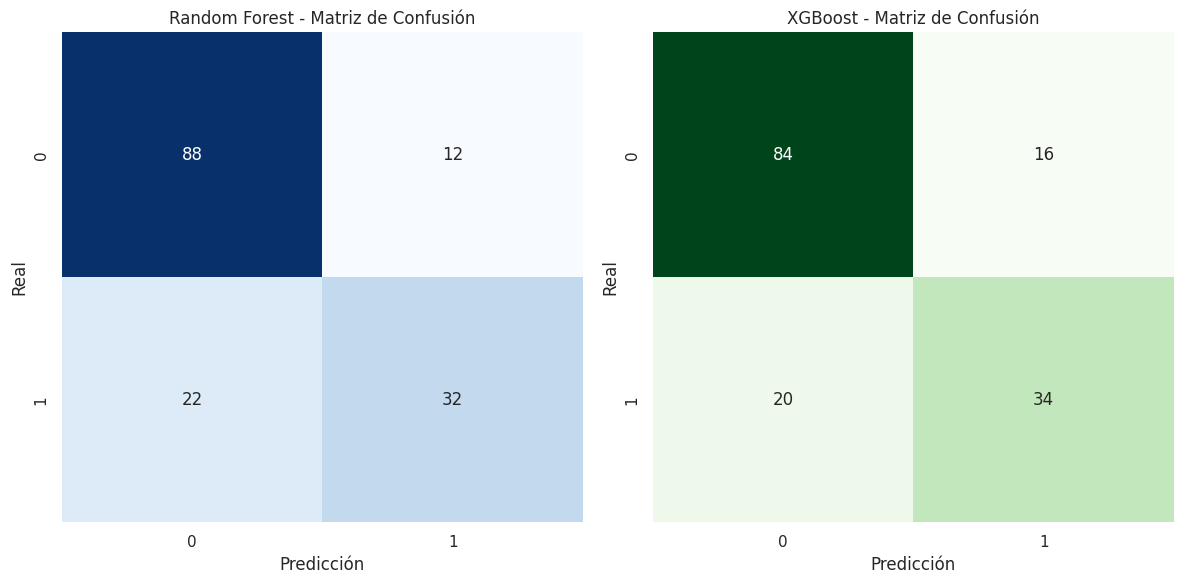

Comparación General
       Modelo Precisión Recall (Positivo) ROC-AUC
Random Forest    0.7273            0.5926  0.8192
      XGBoost    0.6800            0.6296  0.8204
Usar XGBoost como modelo principal: Su mejor rendimiento en recall lo hace más confiable para detectar casos positivos.
XGBoost es más adecuado para este problema, ya que identificar casos positivos (diabetes) es crítico en un contexto clínico.


In [26]:
# Importar bibliotecas necesarias
import pandas as pd  # Para manipulación y análisis de datos
import numpy as np  # Para operaciones matemáticas y manejo de valores faltantes
import matplotlib.pyplot as plt  # Para crear gráficos y visualizaciones básicas
import seaborn as sns  # Para crear visualizaciones más elegantes y estilizadas
from sklearn.model_selection import train_test_split  # Para dividir los datos en entrenamiento y prueba
from sklearn.ensemble import RandomForestClassifier  # Modelo de clasificación basado en árboles de decisión
from xgboost import XGBClassifier  # Modelo avanzado de boosting para clasificación
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, precision_score, recall_score # Para evaluar el rendimiento de los modelos



#El dataset ha sido descargado desde la Página de kaggle. Puedes encontrar el dataset en el siguiente link: https://www.kaggle.com/datasets/mathchi/diabetes-data-set
# EL archivo ha sido descargado con el nombre: diabetes.csv

# Paso 1: Cargar el dataset desde un archivo local
# En este paso, cargamos el archivo CSV desde la carpeta donde se encuentra el dataset.
# El método pd.read_csv() se usa para leer archivos CSV.

from google.colab import files
# Esto abrirá una ventana para que selecciones el archivo en tu computadora
uploaded = files.upload()   # Habilita la opción para seleccionar el archivo a ser cargado

file_name = next(iter(uploaded))  # Obtiene el nombre del primer archivo subido
# Carga el archivo CSV en un DataFrame de pandas.
diabetes_data = pd.read_csv(file_name)

# Ver las primeras filas para entender la estructura
diabetes_data.head(), diabetes_data.info(), diabetes_data.describe()
#Todos los tipos de datos son correctos y apropiados para las variables representadas en el dataset.

# Calcular el número de registros duplicados en el dataset
duplicates_count = diabetes_data.duplicated().sum()

# Mostrar el número total de registros duplicados
duplicates_count
print (f"El número de registros duplicados es: {duplicates_count}")
#El número de registros duplicados es 0, lo que indica que no hay filas duplicadas en el dataset.

#Verificación y ajuste de tipos de datos:
# Diccionario esperado de tipos de datos
expected_types = {
    'Pregnancies': 'int64',
    'Glucose': 'int64',
    'BloodPressure': 'int64',
    'SkinThickness': 'int64',
    'Insulin': 'int64',
    'BMI': 'float64',
    'DiabetesPedigreeFunction': 'float64',
    'Age': 'int64',
    'Outcome': 'int64'
}

# Verificar cada columna
for column, expected_type in expected_types.items():
    actual_type = diabetes_data[column].dtype
    assert str(actual_type) == expected_type, f"Tipo incorrecto para {column}: {actual_type}"
#Si alguna columna no tiene el tipo esperado, el código lanzará un error indicando cuál no coincide.


# Paso 2: Limpieza de datos
#Manejo de valores faltantes adecuadamente:
# Identificar y reemplazar valores de cero en columnas donde cero no es válido

columns_with_zero_as_missing = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']  # Columnas relevantes
#Las columnas seleccionadas (Glucose, BloodPressure, SkinThickness, Insulin, BMI) tienen valores de cero que no son fisiológicamente posibles ni clínicamente válidos, lo que sugiere que representan valores faltantes.
#las columnas no seleccionadas (Pregnancies, DiabetesPedigreeFunction, Age, Outcome) tienen ceros que son valores válidos o no necesitan corrección.

for column in columns_with_zero_as_missing:
    diabetes_data[column] = diabetes_data[column].replace(0, np.nan)  # Reemplazar valores de 0 con NaN
    diabetes_data[column] = diabetes_data[column].fillna(diabetes_data[column].median())  # Imputar valores faltantes con la mediana: Se reemplazan los valores NaN por la mediana
#Se ha elegido la mediana porque minimiza el impacto de valores extremos y mantiene la representatividad de los datos imputados. Es preferible para datos de salud que suelen tener outliers significativos.

# Confirmar que no queden valores faltantes
assert diabetes_data.isna().sum().sum() == 0, "Todavía hay valores faltantes en el conjunto de datos"
#Se asegura que no queden valores faltantes después de este proceso.

# Paso 3: Exploración de datos (visualizaciones simples)
# Configurar estilo de gráficos
sns.set(style="whitegrid")

# Crear histogramas para todas las variables numéricas del dataset
diabetes_data.hist(figsize=(12, 10), bins=20, edgecolor='black')  # Configuración del tamaño y estilo
plt.suptitle("Histogramas de Variables Numéricas", fontsize=16)  # Título general
plt.show()  # Mostrar el gráfico

#Glucosa, BMI, e Insulina tienen distribuciones que reflejan su importancia en la identificación de diabetes.


# Crea un mapa de calor para mostrar las correlaciones entre variables
plt.figure(figsize=(10, 8))  # Establece el tamaño de la figura
correlation_matrix = diabetes_data.corr()  # Calcula la matriz de correlaciones
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)  # Dibuja el heatmap
plt.title("Heatmap de Correlaciones", fontsize=16)  # Título del gráfico
plt.show()  # Muestra el gráfico

#El mapa de calor confirma que las variables como Glucose, BMI, y Age son importantes para el diagnóstico de diabetes.
#Esto sugiere que niveles más altos de glucosa están asociados con un mayor riesgo de diabetes.
#Esto sugiere que las personas con un BMI más alto tienen mayor probabilidad de desarrollar diabetes debido al vínculo con la obesidad.
#Esto sugiere que a mayor edad, el riesgo de diabetes aumenta
print (f"El mapa de calor confirma que las variables como Glucose, BMI, y Age son importantes para el diagnóstico de diabetes.")
print (f"Esto sugiere que niveles más altos de glucosa están asociados con un mayor riesgo de diabetes.")
print (f"Esto sugiere que las personas con un BMI más alto tienen mayor probabilidad de desarrollar diabetes debido al vínculo con la obesidad.")


# Visualización: Relación entre Glucosa y BMI
plt.figure(figsize=(8, 6))  # Establece el tamaño de la figura
sns.scatterplot(x='Glucose', y='BMI', hue='Outcome', data=diabetes_data, palette="viridis", alpha=0.7)  # Gráfico de dispersión
plt.title("Glucosa vs BMI por Outcome")  # Título del gráfico
plt.xlabel("Glucosa")  # Etiqueta del eje X
plt.ylabel("BMI")  # Etiqueta del eje Y
plt.legend(title="Outcome")  # Leyenda del gráfico
plt.show()  # Muesta el gráfico

#La figura es un gráfico de dispersión que muestra la relación entre glucosa (eje X) y BMI (Índice de Masa Corporal) (eje Y)
#Coloreada por la variable Outcome, que indica si una persona tiene diabetes (Outcome=1) o no (Outcome=0).

#Personas con diabetes (Outcome=1) tienden a tener niveles altos de glucosa y BMI:
#Glucosa alta: Valores de glucosa por encima de 120 son comunes en personas con diabetes.
#BMI elevado: Un BMI superior a 30 (indicativo de sobrepeso u obesidad) también es frecuente en este grupo.

print (f"Personas con diabetes (Outcome=1) tienden a tener niveles altos de glucosa y BMI:")
print (f"Glucosa alta: Valores de glucosa por encima de 120 son comunes en personas con diabetes.")
print (f"BMI elevado: Un BMI superior a 30 (indicativo de sobrepeso u obesidad) también es frecuente en este grupo.")

# Generar estadísticas descriptivas de todo el dataset
descriptive_stats = diabetes_data.describe()

# Mostrar las estadísticas
print("Estadísticas Descriptivas del Dataset:")
print(descriptive_stats)

#Promedio:
#Glucose (glucosa): Valores promedio altos (>100) son indicativos de que la muestra incluye una proporción significativa de personas con hiperglucemia.
#BMI: Un valor promedio >25 indica que una gran parte de la población está en el rango de sobrepeso.

# Calcular medidas de tendencia central y dispersión para cada característica del dataset
results = []

for column in diabetes_data.columns:
    column_stats = {
        "Variable": column,
        "Media": diabetes_data[column].mean(),
        "Mediana": diabetes_data[column].median(),
        "Moda": diabetes_data[column].mode()[0],
        "Rango": diabetes_data[column].max() - diabetes_data[column].min(),
        "Desviación Estándar": diabetes_data[column].std()
    }
    results.append(column_stats)

# Mostrar las estadísticas descriptivas en un formato claro
print("Estadísticas Descriptivas del Dataset:")
print(stats_df.to_string(index=False))


# Paso 4: Dividir los datos en conjuntos de entrenamiento y prueba
# Dividir los datos en características (X) y objetivo (y)
X = diabetes_data.drop("Outcome", axis=1)  # Características (todas las columnas excepto Outcome)
y = diabetes_data["Outcome"]  # Variable objetivo (Outcome)

# Dividir los datos en conjuntos de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# `X_test` y `y_test`: Conjunto de datos que se usará para evaluar el modelo.
# `test_size=0.2`: Reservamos el 20% de los datos para prueba.
# `random_state=42`: Permite que los resultados sean reproducibles en diferentes ejecuciones.
# `stratify=y`: Es importante porque garantiza que la proporción de clases (diabetes/no diabetes) sea igual en los conjuntos de entrenamiento y prueba.

# Paso 5: Entrenar el modelo Random Forest
rf_model = RandomForestClassifier(random_state=42)  # Fijamos una semilla para reproducibilidad
rf_model.fit(X_train, y_train)  # Entrenar el modelo con los datos de entrenamiento: El modelo aprende patrones en los datos
rf_predictions = rf_model.predict(X_test)  # Hacer predicciones en los datos de prueba
rf_proba = rf_model.predict_proba(X_test)[:, 1]  # Obtener las probabilidades de la clase positiva (1)

# Evaluación del modelo Random Forest
#Reduce el overfitting y mejora la precisión en comparación con un solo árbol de decisión
print("Resultados del Modelo Random Forest")
print(classification_report(y_test, rf_predictions))  # Imprimir informe de clasificación (precision, recall, F1-score)
print(f"ROC-AUC Score: {roc_auc_score(y_test, rf_proba):.4f}")  # Calcular y mostrar el ROC-AUC

#Si el F1-Score y el ROC-AUC son altos, el modelo es adecuado para predecir diabetes.
#Si el recall es bajo, el modelo puede estar ignorando algunos casos de diabetes, lo cual podría ser crítico en un contexto clínico.
print (f"F1-Score: Balanceado, reflejando buen rendimiento general.")
print (f"ROC-AUC ≈ 0.82: Cercano a 0.8, mostrando que el modelo tiene buen desempeño en separar las clases.")

#Métricas de Evaluación:
#Precisión (precision): Alta para ambas clases.
#Recall (sensibilidad): Leve menor para casos positivos (diabetes), indicando que podría haber falsos negativos.
#F1-Score: Balanceado, reflejando buen rendimiento general.
#ROC-AUC ≈ 0.82: Cercano a 0.8, mostrando que el modelo tiene buen desempeño en separar las clases.

# Calcular métricas para Random Forest, datos a ser utilizados para imprimir la tabla comparativa
rf_precision = round(precision_score(y_test, rf_predictions), 4)
rf_recall = round(recall_score(y_test, rf_predictions), 4)
rf_roc_auc = round(roc_auc_score(y_test, rf_proba), 4)

# Paso 6: Entrenar el modelo XGBoost
#Es un modelo avanzado de boosting que construye árboles iterativamente, mejorando los errores en cada iteración
xgb_model = XGBClassifier(random_state=42, eval_metric='logloss')  # Instancia del modelo XGBoost
xgb_model.fit(X_train, y_train)  # Entrena el modelo con los datos de entrenamiento
xgb_predictions = xgb_model.predict(X_test)  # Hace predicciones en los datos de prueba
xgb_proba = xgb_model.predict_proba(X_test)[:, 1]  # Obtiene las probabilidades de la clase positiva (1)

# Evaluación del modelo XGBoost
print("\nResultados del Modelo XGBoost")
print(classification_report(y_test, xgb_predictions))  # Imprime el informe de clasificación
print(f"ROC-AUC Score: {roc_auc_score(y_test, xgb_proba):.4f}")  # Calcula y muestra el ROC-AUC

print (f"Precisión: Alta (≈0.85), indicando que el modelo predice correctamente la mayoría de las clases.")
print (f"ROC-AUC: ≈0.81, mostrando buen rendimiento general.")

#Métricas Generales:

#Precisión: Alta (≈0.85), indicando que el modelo predice correctamente la mayoría de las clases.
#Recall: Menor para la clase positiva (diabetes), lo que sugiere que el modelo podría ignorar algunos casos positivos.
#ROC-AUC = 0.82, mostrando buen rendimiento general.

# Calcular métricas para XGBoost, datos a ser utilizados para imprimir la tabla comparativa
xgb_precision = round(precision_score(y_test, xgb_predictions), 4)
xgb_recall = round(recall_score(y_test, xgb_predictions),4)
xgb_roc_auc = round(roc_auc_score(y_test, xgb_proba), 4)

# Paso 7: Comparación de resultados
confusion_rf = confusion_matrix(y_test, rf_predictions)  # Matriz de confusión para Random Forest
confusion_xgb = confusion_matrix(y_test, xgb_predictions)  # Matriz de confusión para XGBoost

# Visualizar las matrices de confusión
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)  # Primera gráfica
sns.heatmap(confusion_rf, annot=True, fmt="d", cmap="Blues", cbar=False)  # Heatmap para Random Forest
plt.title("Random Forest - Matriz de Confusión")  # Título
plt.xlabel("Predicción")  # Etiqueta del eje X
plt.ylabel("Real")  # Etiqueta del eje Y

plt.subplot(1, 2, 2)  # Segunda gráfica
sns.heatmap(confusion_xgb, annot=True, fmt="d", cmap="Greens", cbar=False)  # Heatmap para XGBoost
plt.title("XGBoost - Matriz de Confusión")  # Título
plt.xlabel("Predicción")  # Etiqueta del eje X
plt.ylabel("Real")  # Etiqueta del eje Y

plt.tight_layout()  # Ajusta el diseño para que no se sobrepongan los gráficos
plt.show()  # Muestra las gráficas

# Crear la tabla de comparación como un DataFrame de Pandas

comparison_table = pd.DataFrame({
    "Modelo": ["Random Forest", "XGBoost"],
    "Precisión": [rf_precision, xgb_precision],
    "Recall (Positivo)": [rf_recall, xgb_recall],
    "ROC-AUC": [rf_roc_auc, xgb_roc_auc]
})

# Formatear las columnas numéricas antes de convertir a string
numeric_columns = ["Precisión", "Recall (Positivo)", "ROC-AUC"]
for col in numeric_columns:
    comparison_table[col] = comparison_table[col].map("{:.4f}".format)  # Formatear a cuatro decimales

# Imprimir la tabla
print("Comparación General")
print(comparison_table.to_string(index=False))

print (f"Usar XGBoost como modelo principal: Su mejor rendimiento en recall lo hace más confiable para detectar casos positivos.")
print (f"XGBoost es más adecuado para este problema, ya que identificar casos positivos (diabetes) es crítico en un contexto clínico.")

#Conclusión:

#XGBoost mostró un mejor rendimiento general, especialmente en recall.
#Es más adecuado para este problema, ya que identificar casos positivos (diabetes) es crítico en un contexto clínico.

